In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline

print('done')

done


In [2]:
train_df = pd.read_excel("C:\\Users\\admin\\Desktop\\flight\\Data_Train.xlsx")
test_df = pd.read_excel("C:\\Users\\admin\\Desktop\\flight\\Test_set.xlsx")

In [3]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
df  = train_df.append(test_df,sort=False)

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [7]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

<AxesSubplot:xlabel='Source', ylabel='Price'>

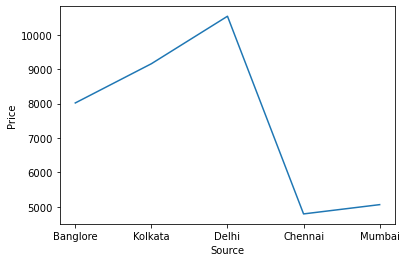

In [8]:
sns.lineplot(x = "Source", y = "Price", data = df, )

<AxesSubplot:xlabel='Destination', ylabel='Price'>

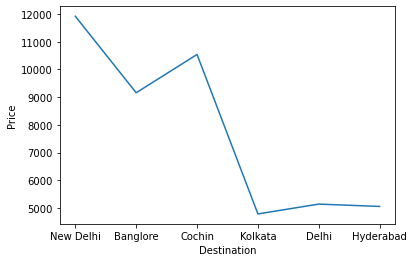

In [9]:
sns.lineplot(x = "Destination", y = "Price", data = df )

In [10]:
sns.set(rc={'figure.figsize':(15,15)})

<AxesSubplot:xlabel='Airline', ylabel='Price'>

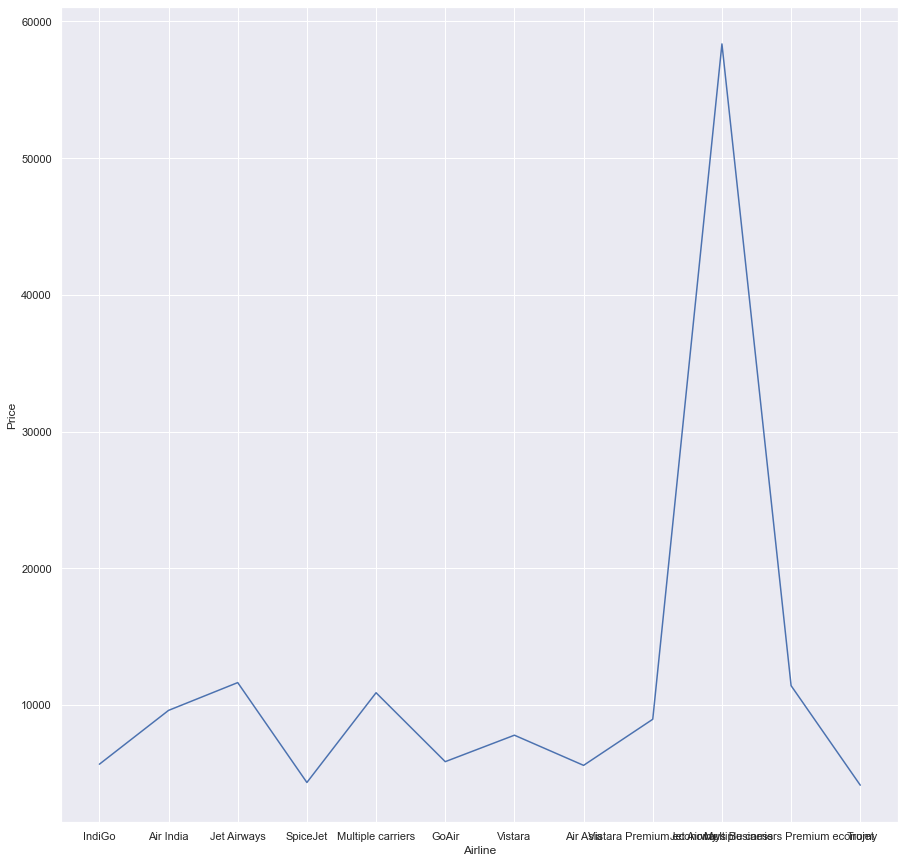

In [11]:
sns.lineplot(x = "Airline", y = "Price", data = df, ci = False)

<AxesSubplot:xlabel='Airline', ylabel='Price'>

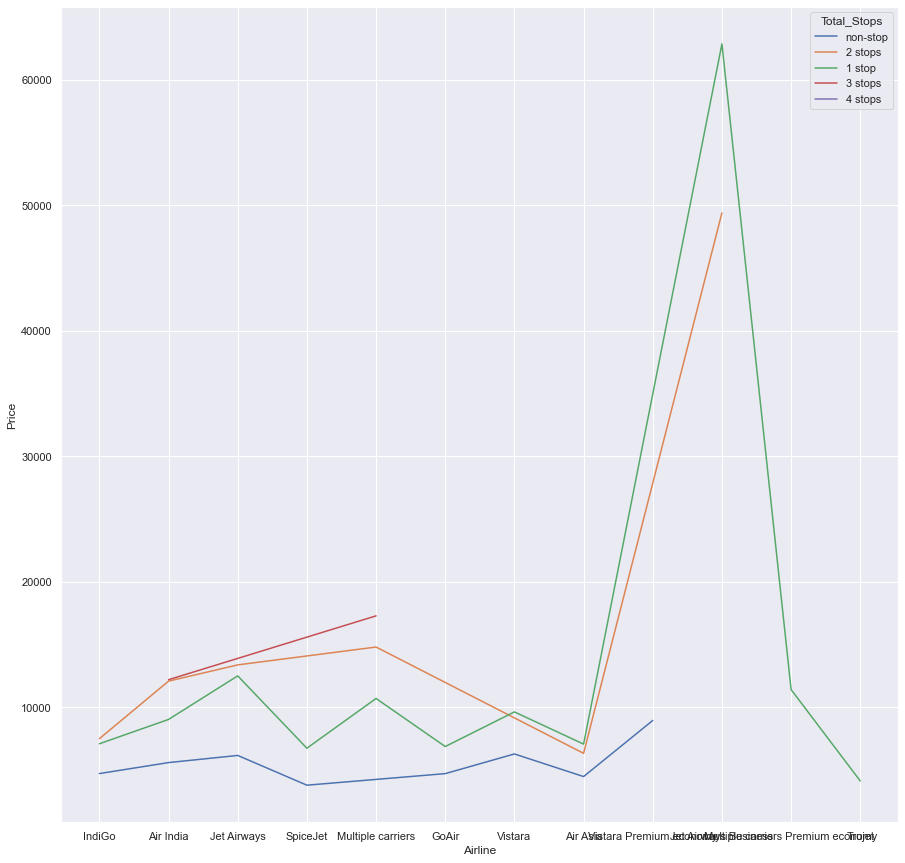

In [12]:
sns.lineplot(x = "Airline", y = "Price", data = df, ci = False, markers = True, hue = "Total_Stops")

<AxesSubplot:xlabel='Destination', ylabel='Price'>

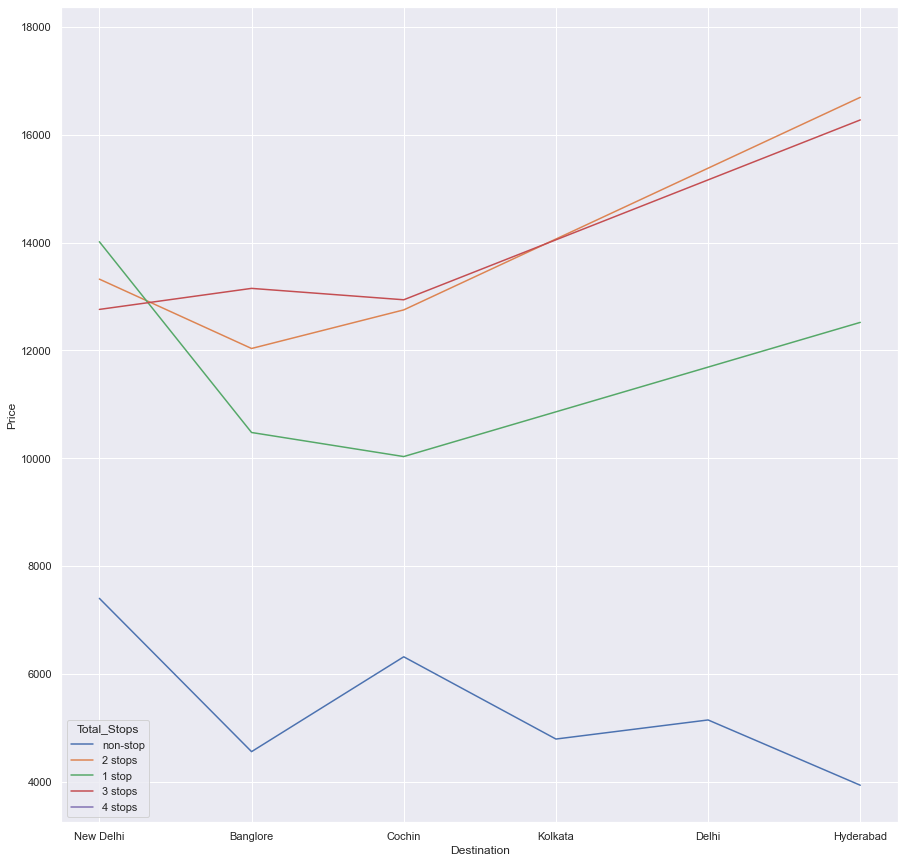

In [13]:
sns.lineplot(x = "Destination", y = "Price", data = df, hue = "Total_Stops", ci = False)

<AxesSubplot:xlabel='Source', ylabel='Price'>

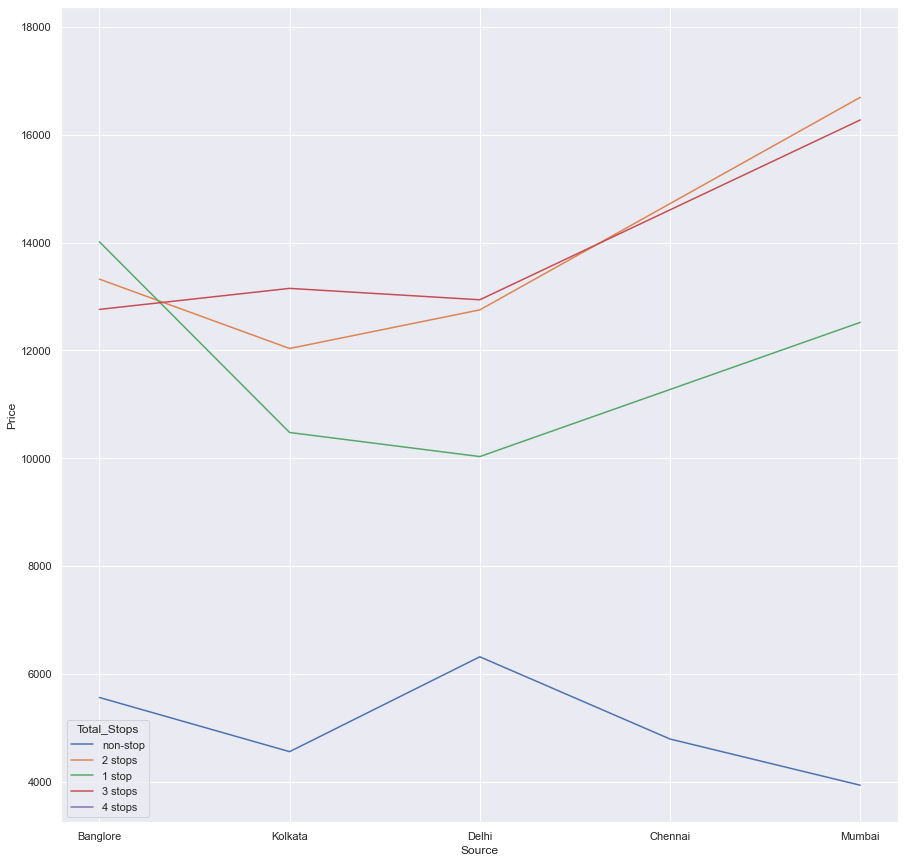

In [14]:
sns.lineplot(x = "Source", y = "Price", data = df, hue = "Total_Stops", ci = False)

#define relation ship between source and price of tickets. there is clear realtionship between no of stops and the price of tickets aswell.

<AxesSubplot:xlabel='Destination', ylabel='Price'>

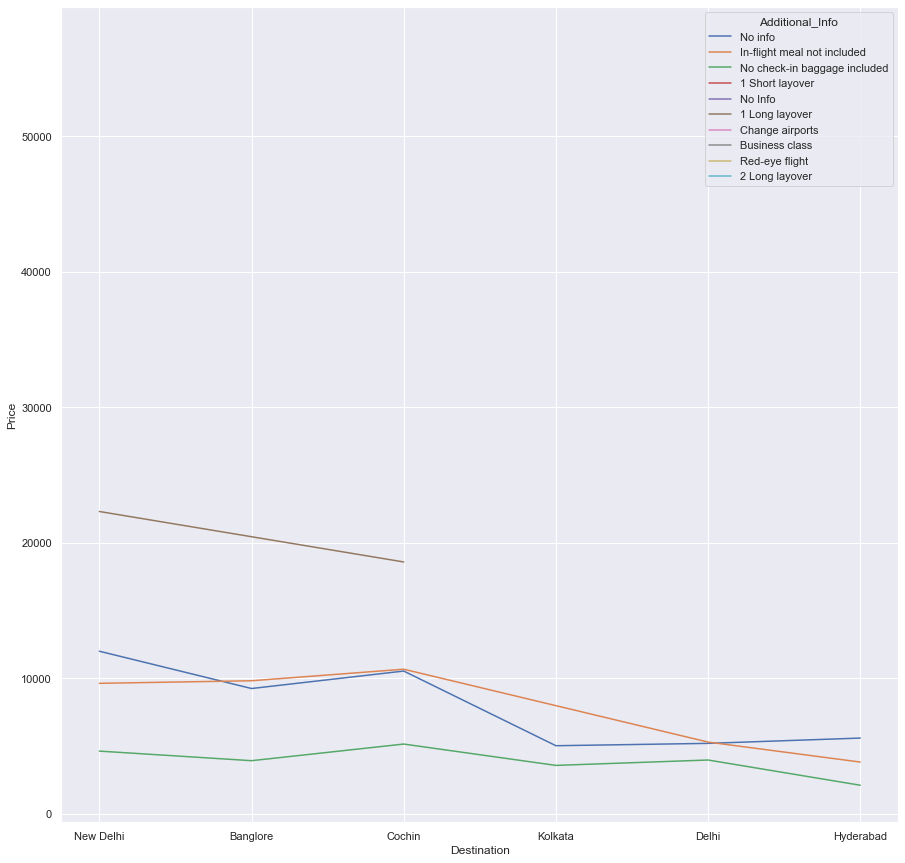

In [15]:
sns.lineplot(x = "Destination", y = "Price", data = df, hue = "Additional_Info", ci = False)

<AxesSubplot:xlabel='Airline', ylabel='Price'>

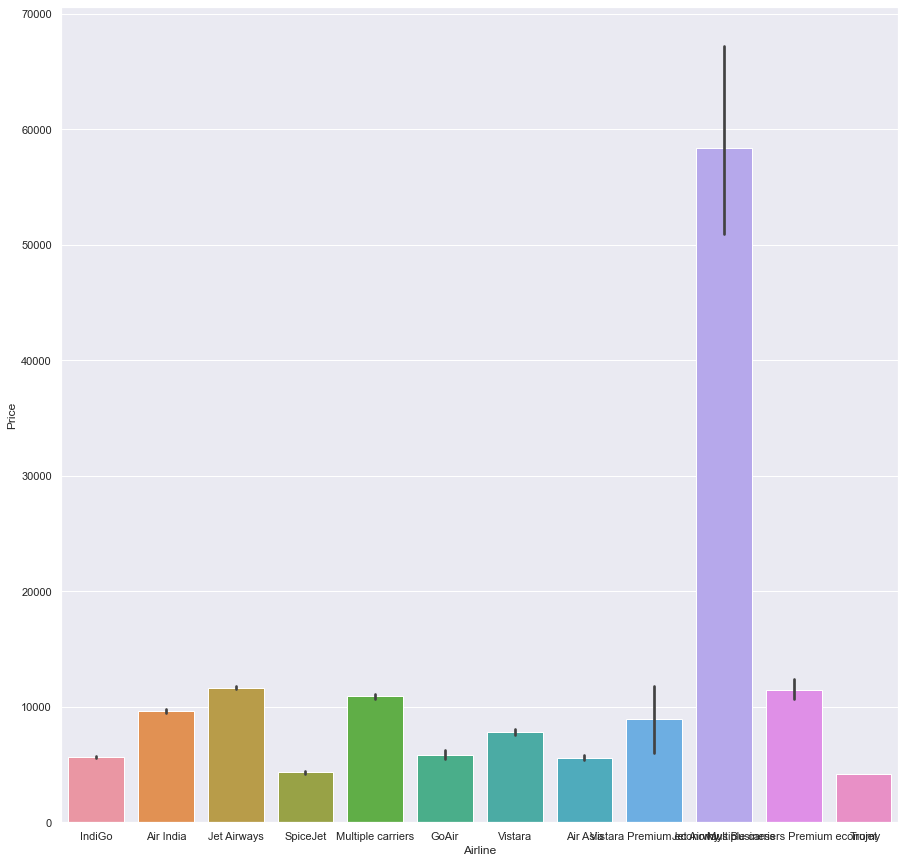

In [16]:
sns.barplot(x="Airline",y="Price", data=df)

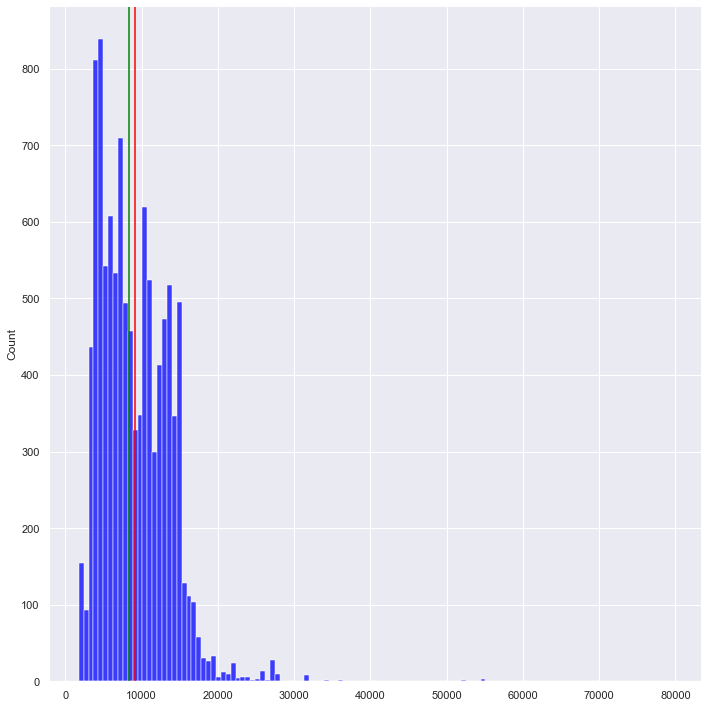

In [17]:
mean = df["Price"].mean()
mean

median = df["Price"]. median()

sns.displot(df["Price"].values, kde = False, color = 'blue', height = 10)

#plot mean in the graph

plt.axvline(mean,0,1, color = "red")
plt.axvline(median,0,1, color = "green")

In [18]:
#check null values in date of journey column
df["Date_of_Journey"].isnull().sum()

0

In [19]:
# check null values in total stop column

df["Total_Stops"].isnull().sum()

1

In [20]:
#convert date from strting type to datetime type
df["Date_of_Journey"] = pd.to_datetime(df.Date_of_Journey)

In [21]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                     float64
dtype: object

In [22]:
#feature engineerin - extracte date related features

df["year"] = pd.DatetimeIndex(df.Date_of_Journey).year
df["month"] = pd.DatetimeIndex(df.Date_of_Journey).month
df["day"] = pd.DatetimeIndex(df.Date_of_Journey).day
df["week"] = pd.DatetimeIndex(df.Date_of_Journey).week
df["weekday"] = pd.DatetimeIndex(df.Date_of_Journey).weekday

<ipython-input-22-522ed0592c13>:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df["week"] = pd.DatetimeIndex(df.Date_of_Journey).week


In [23]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day,week,weekday
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,2019,3,24,12,6
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,2019,1,5,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,2019,9,6,36,4
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,2019,12,5,49,3
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,2019,1,3,1,3


<AxesSubplot:xlabel='weekday', ylabel='Price'>

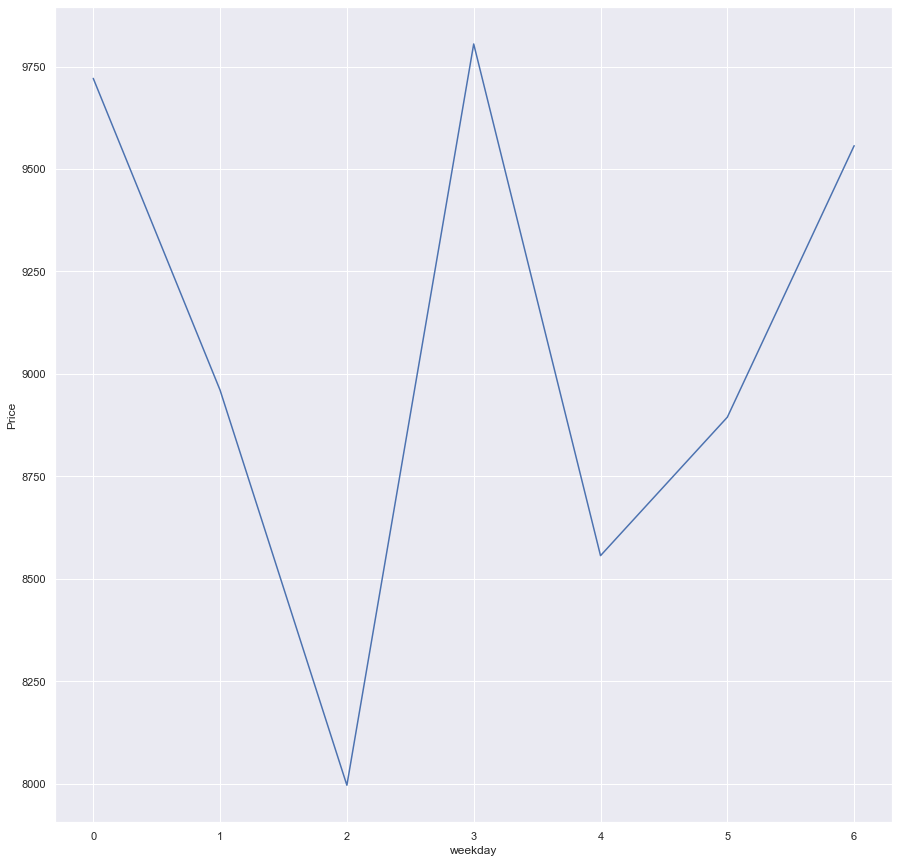

In [24]:
# plotting relationship between weekday and price
sns.lineplot(x = "weekday", y = "Price" , data = df, ci = False)

<AxesSubplot:xlabel='month', ylabel='Price'>

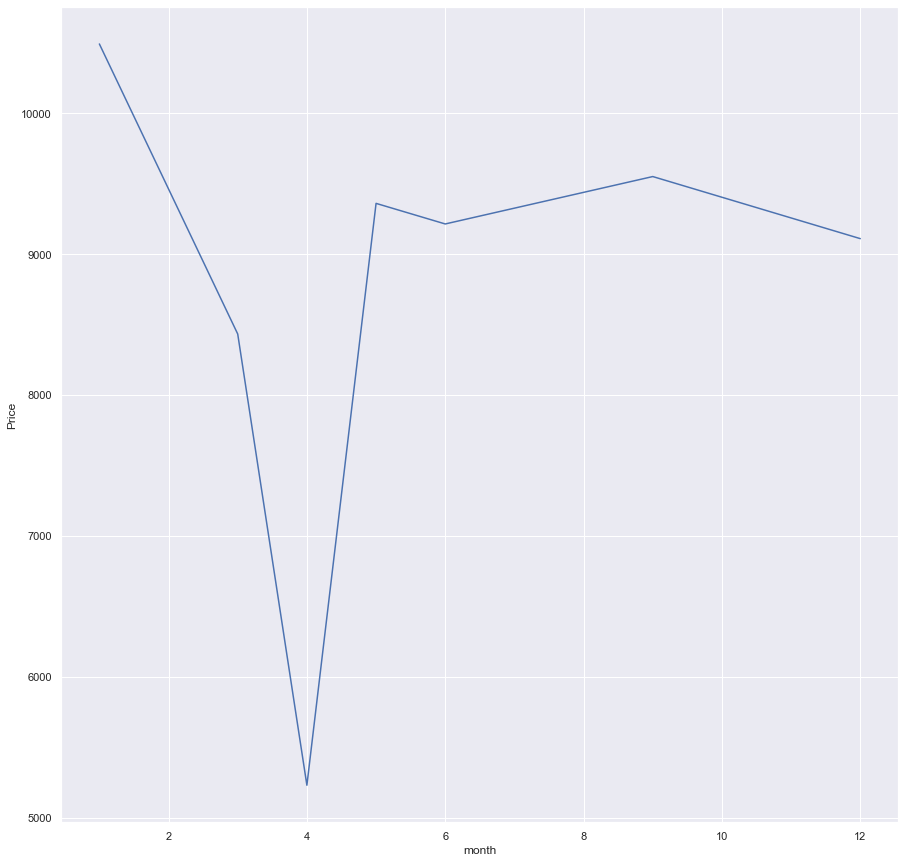

In [25]:
# plotting relationship between month and price
sns.lineplot(x = "month", y = "Price" , data = df, ci = False,)

<AxesSubplot:xlabel='april', ylabel='Price'>

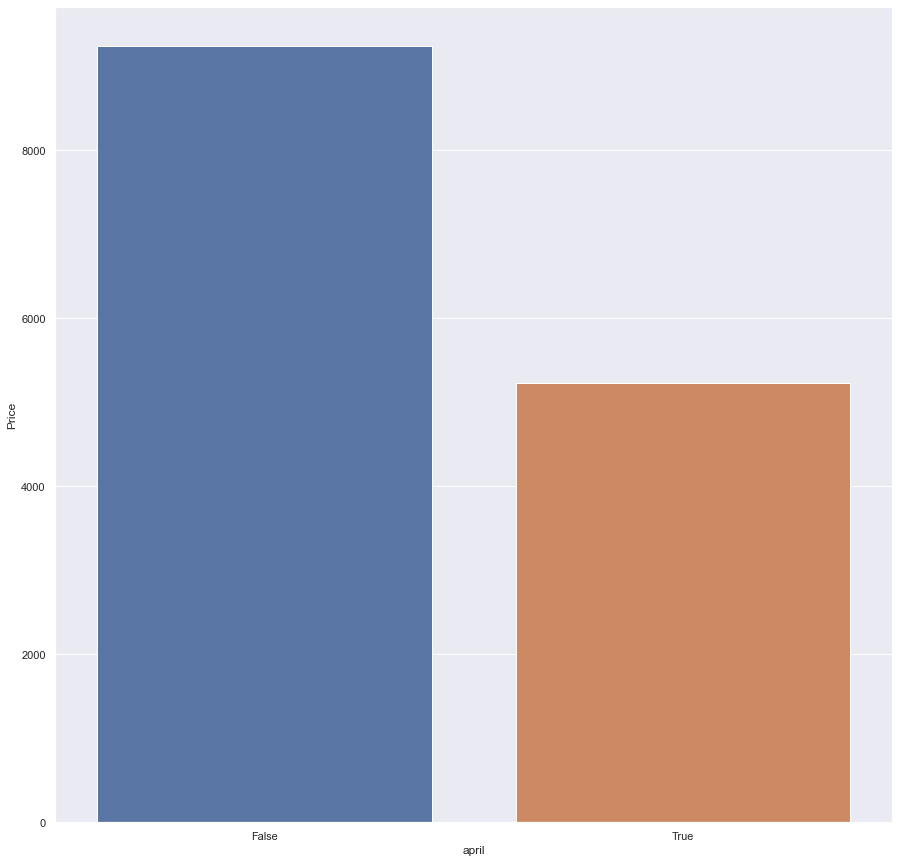

In [26]:
#check the relationship between price and month(April)

df["april"] = df["month"] == 4

sns.barplot(x = "april", y = "Price", data = df, ci= False)

In [27]:
df.groupby(by='Additional_Info').agg('count')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,year,month,day,week,weekday,april
Additional_Info,,,,,,,,,,,,,,,,
1 Long layover,20,20,20,20,20,20,20,20,20,19,20,20,20,20,20,20
1 Short layover,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2 Long layover,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Business class,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,5
Change airports,8,8,8,8,8,8,8,8,8,7,8,8,8,8,8,8
In-flight meal not included,2426,2426,2426,2426,2426,2426,2426,2426,2426,1982,2426,2426,2426,2426,2426,2426
No Info,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
No check-in baggage included,396,396,396,396,396,396,396,396,396,320,396,396,396,396,396,396
No info,10493,10493,10493,10493,10492,10493,10493,10493,10492,8345,10493,10493,10493,10493,10493,10493


<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

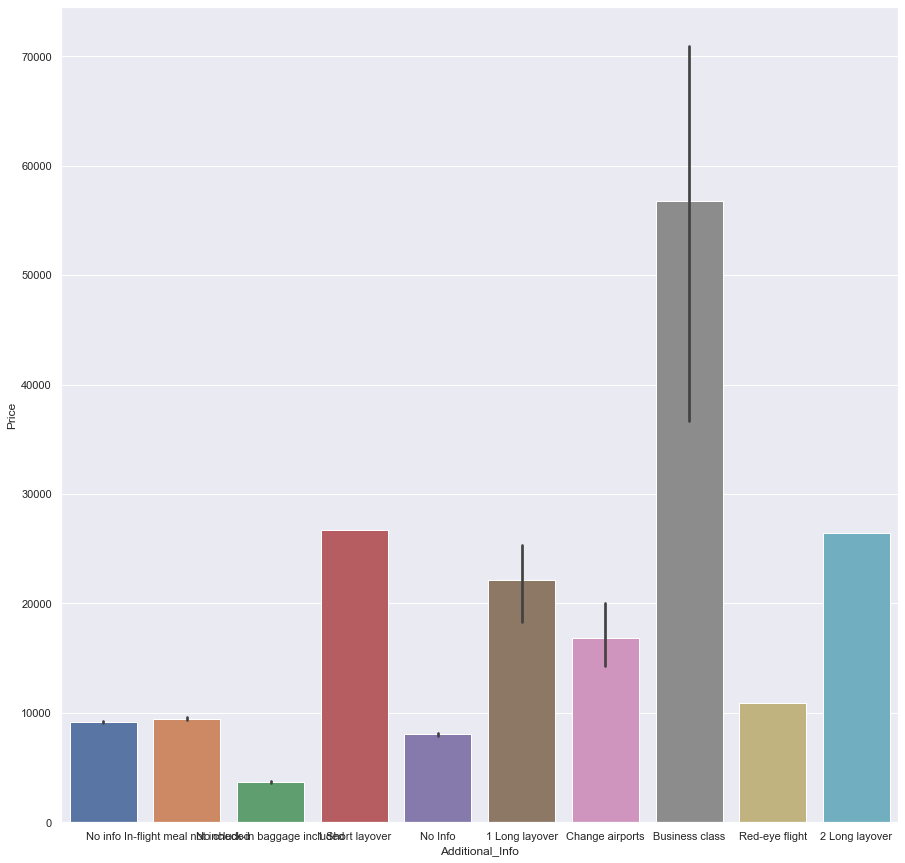

In [28]:
#check relationship between additional info and price

sns.barplot(x ="Additional_Info", y = "Price", data = df )

<AxesSubplot:xlabel='no_meal', ylabel='Price'>

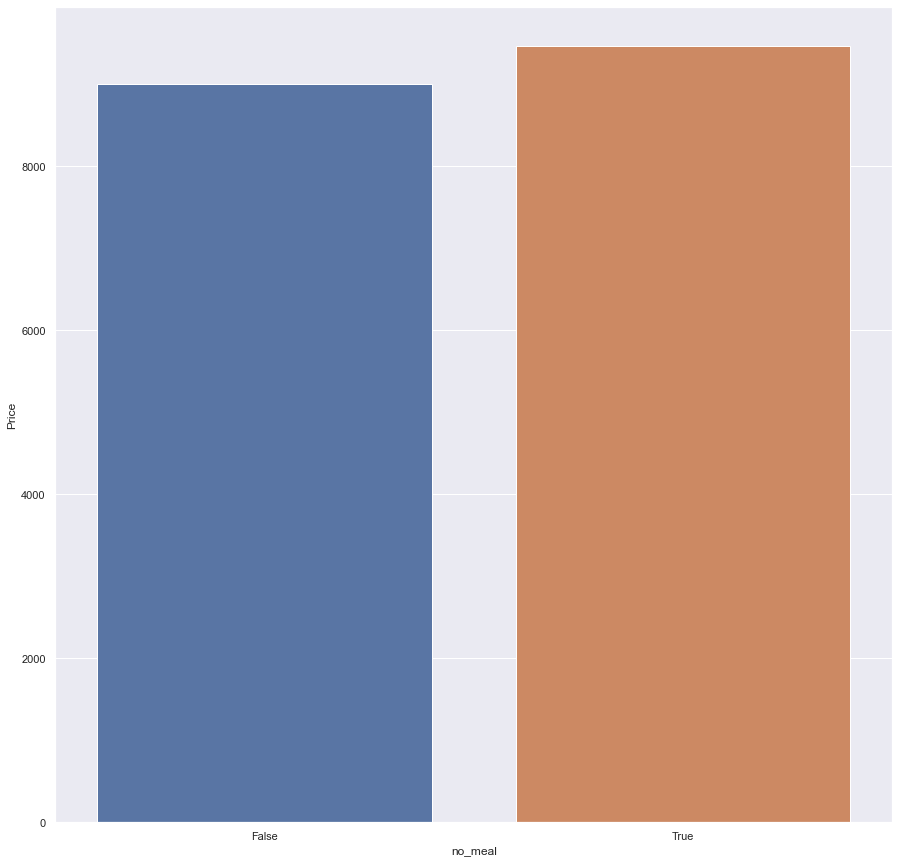

In [29]:
#check relationship between price and noflight meal values

df["no_meal"] = df["Additional_Info"] == "In-flight meal not included"
df["no_meal"]

sns.barplot(x = "no_meal", y = "Price", data = df, ci = False)

In [30]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day,week,weekday,april,no_meal
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,2019,3,24,12,6,False,False
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,2019,1,5,1,5,False,False
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,2019,9,6,36,4,False,False
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,2019,12,5,49,3,False,False
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,2019,1,3,1,3,False,False


In [31]:
df.groupby(by='Airline').agg('count')

,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day,week,weekday,april,no_meal
Airline,,,,,,,,,,,,,,,,,
Air Asia,405,405,405,405,405,405,405,405,405,319,405,405,405,405,405,405,405
Air India,2192,2192,2192,2191,2192,2192,2192,2191,2192,1752,2192,2192,2192,2192,2192,2192,2192
GoAir,240,240,240,240,240,240,240,240,240,194,240,240,240,240,240,240,240
IndiGo,2564,2564,2564,2564,2564,2564,2564,2564,2564,2053,2564,2564,2564,2564,2564,2564,2564
Jet Airways,4746,4746,4746,4746,4746,4746,4746,4746,4746,3849,4746,4746,4746,4746,4746,4746,4746
Jet Airways Business,8,8,8,8,8,8,8,8,8,6,8,8,8,8,8,8,8
Multiple carriers,1543,1543,1543,1543,1543,1543,1543,1543,1543,1196,1543,1543,1543,1543,1543,1543,1543
Multiple carriers Premium economy,16,16,16,16,16,16,16,16,16,13,16,16,16,16,16,16,16
SpiceJet,1026,1026,1026,1026,1026,1026,1026,1026,1026,818,1026,1026,1026,1026,1026,1026,1026


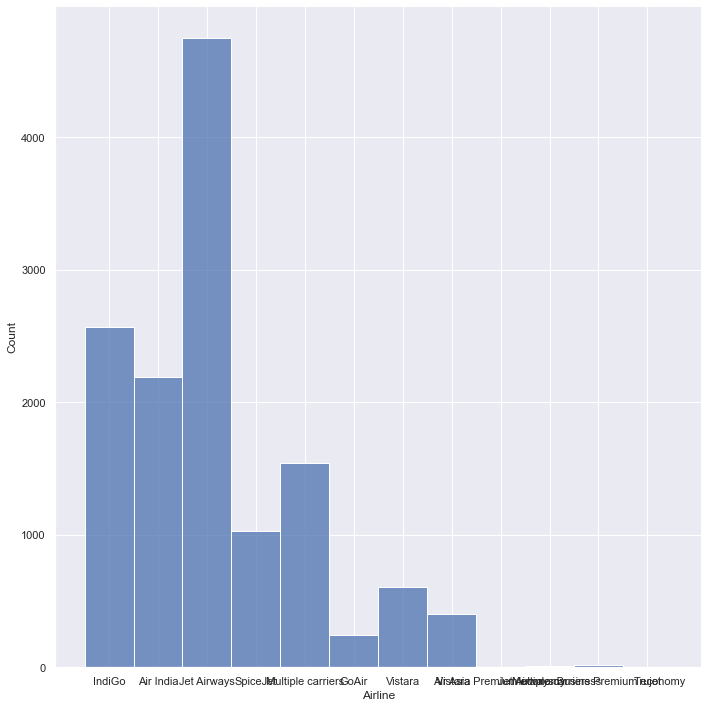

In [32]:
sns.displot(df["Airline"], kde = False, height = 10)

In [33]:
#shorten the airline name characters to visualize the data

df["Airline"] = df["Airline"].apply(lambda x: 'VPE' if 'Vistara Premium economy' in x else x)
df["Airline"] = df["Airline"].apply(lambda x: 'JAB' if 'Jet Airways Business' in x else x)
df["Airline"] = df["Airline"].apply(lambda x: 'MCPE' if 'Multiple carriers Premium economy' in x else x)
df["Airline"] = df["Airline"].apply(lambda x: 'MC' if 'Multiple carriers' in x else x)


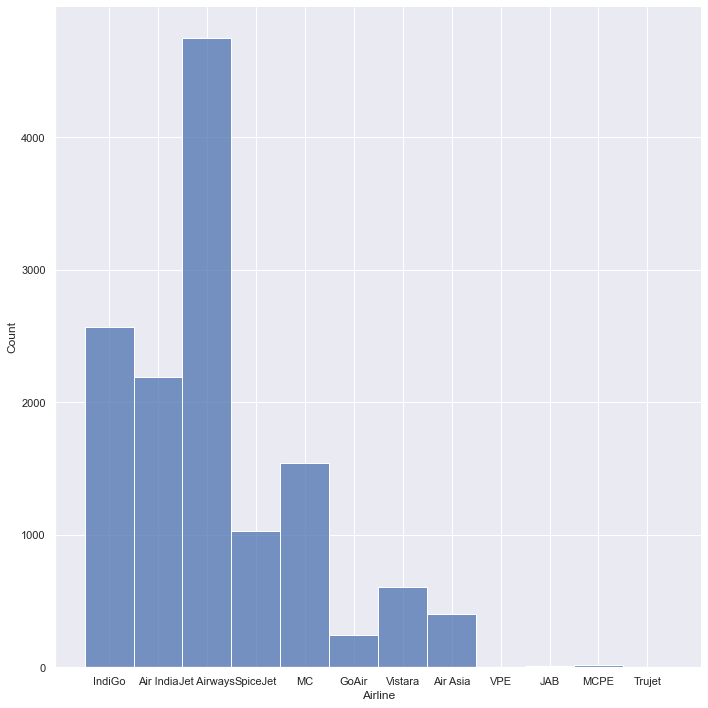

In [34]:
#distribution plot of airlines
sns.displot(df["Airline"], kde = False, height = 10)

<AxesSubplot:xlabel='Airline', ylabel='Price'>

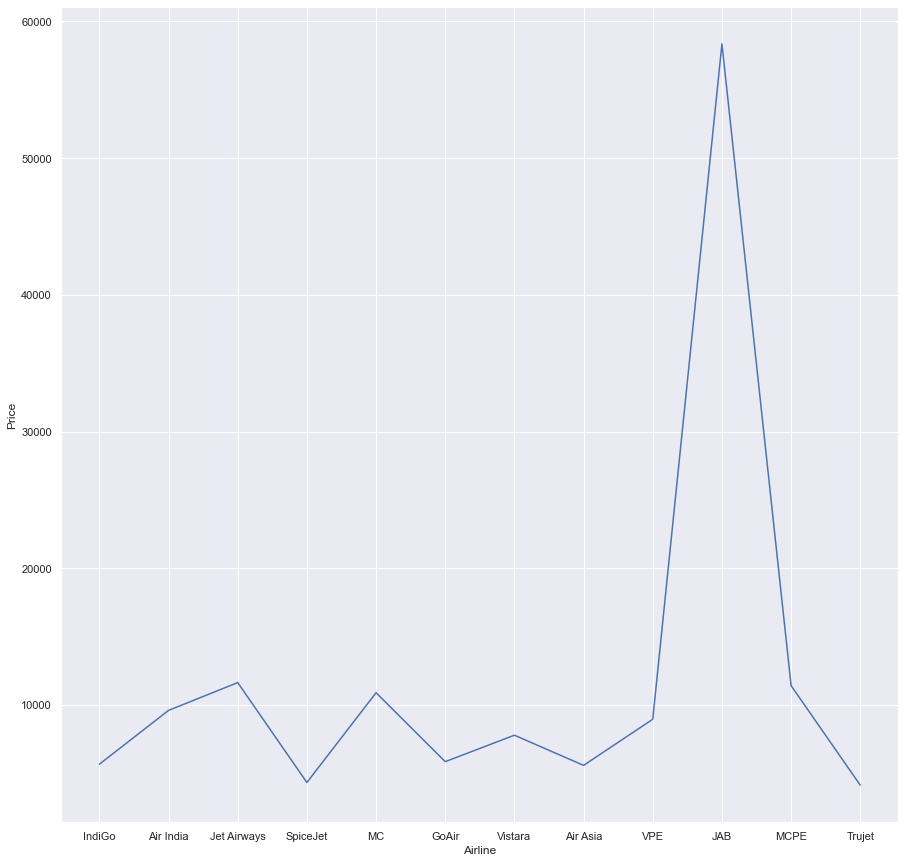

In [35]:
#airline to price line plot
sns.lineplot(x = "Airline", y = "Price", data = df)

In [36]:
#extract features from dep_time using string split function
df["dep_hour"] = df["Dep_Time"].str.split(':').str[0].astype(int)
df["dep_min"] = df["Dep_Time"].str.split(':').str[1].astype(int)
df.drop(columns="Dep_Time", inplace=True)

In [37]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day,week,weekday,april,no_meal,dep_hour,dep_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,2019,3,24,12,6,False,False,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.0,2019,1,5,1,5,False,False,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882.0,2019,9,6,36,4,False,False,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218.0,2019,12,5,49,3,False,False,18,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302.0,2019,1,3,1,3,False,False,16,50


In [38]:
#extract features from Arrival_Time column using string split function

df["Arrival_Time"] = df["Arrival_Time"].str.split(" ").str[0]
df["arrival_hour"] = df["Arrival_Time"].str.split(":").str[0].astype(int)
df["arrival_min"] = df["Arrival_Time"].str.split(":").str[1].astype(int)
df.drop(columns="Arrival_Time",inplace=True)

In [39]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,year,month,day,week,weekday,april,no_meal,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,2019,3,24,12,6,False,False,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,2019,1,5,1,5,False,False,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,2019,9,6,36,4,False,False,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,2019,12,5,49,3,False,False,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,2019,1,3,1,3,False,False,16,50,21,35


In [40]:
#extract features from Duration column using string split function

df["duration_hour"] = df["Duration"].str.split(" ").str[0]
df["duration_min"] = df["Duration"].str.split(" ").str[1]
df["duration_hour"] = df["duration_hour"].str.split("h").str[0]
df["duration_min"] = df["duration_min"].str.split("m").str[0]
df["duration_min"]=df["duration_min"].fillna(0)
df["duration_hour"]=df["duration_hour"].fillna(0)  
df["duration_min"] = df["duration_min"].astype(int)
df["duration_hour"] = df["duration_hour"].str.split("m").str[0]
df["duration_hour"] = df["duration_hour"].astype(int)
df.head()



,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,year,...,week,weekday,april,no_meal,dep_hour,dep_min,arrival_hour,arrival_min,duration_hour,duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,2019,...,12,6,False,False,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,2019,...,1,5,False,False,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,2019,...,36,4,False,False,9,25,4,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,2019,...,49,3,False,False,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,2019,...,1,3,False,False,16,50,21,35,4,45


In [41]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,year,...,week,weekday,april,no_meal,dep_hour,dep_min,arrival_hour,arrival_min,duration_hour,duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,2019,...,12,6,False,False,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,2019,...,1,5,False,False,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,2019,...,36,4,False,False,9,25,4,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,2019,...,49,3,False,False,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,2019,...,1,3,False,False,16,50,21,35,4,45


In [42]:
#drop unwanted columns
df.drop("Duration",axis=1, inplace=True)
df.drop("no_meal", inplace = True, axis=1)
df.drop(columns="april", inplace=True)
df.drop(["Date_of_Journey"], axis=1, inplace=True)
df.drop("Route", axis=1, inplace=True)
df.drop("year",axis=1,inplace=True)

In [43]:
df.dtypes

Airline             object
Source              object
Destination         object
Total_Stops         object
Additional_Info     object
Price              float64
month                int64
day                  int64
week                 int64
weekday              int64
dep_hour             int32
dep_min              int32
arrival_hour         int32
arrival_min          int32
duration_hour        int32
duration_min         int32
dtype: object

In [44]:
#change the values in total stops column to intigers

df['Total_Stops'] = df['Total_Stops'].fillna('1 stop')
df['Total_Stops'] = df['Total_Stops'].replace('non-stop','0 stop')
df['Total_Stops'] = df['Total_Stops'].str.split(' ').str[0]
df['Total_Stops'] = df['Total_Stops'].astype('int')

In [45]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Total_Stops           0
Additional_Info       0
Price              2671
month                 0
day                   0
week                  0
weekday               0
dep_hour              0
dep_min               0
arrival_hour          0
arrival_min           0
duration_hour         0
duration_min          0
dtype: int64

In [46]:
#onehot encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Airline'] = encoder.fit_transform(df['Airline'])
df['Source'] = encoder.fit_transform(df['Source'])
df['Destination'] = encoder.fit_transform(df['Destination'])
df['Additional_Info'] = encoder.fit_transform(df['Additional_Info'])

In [47]:
#import the data

df_train = df[0:10683]
df_test = df[10683:]

X = df_train.drop(['Price'],axis=1)
y = df_train.Price

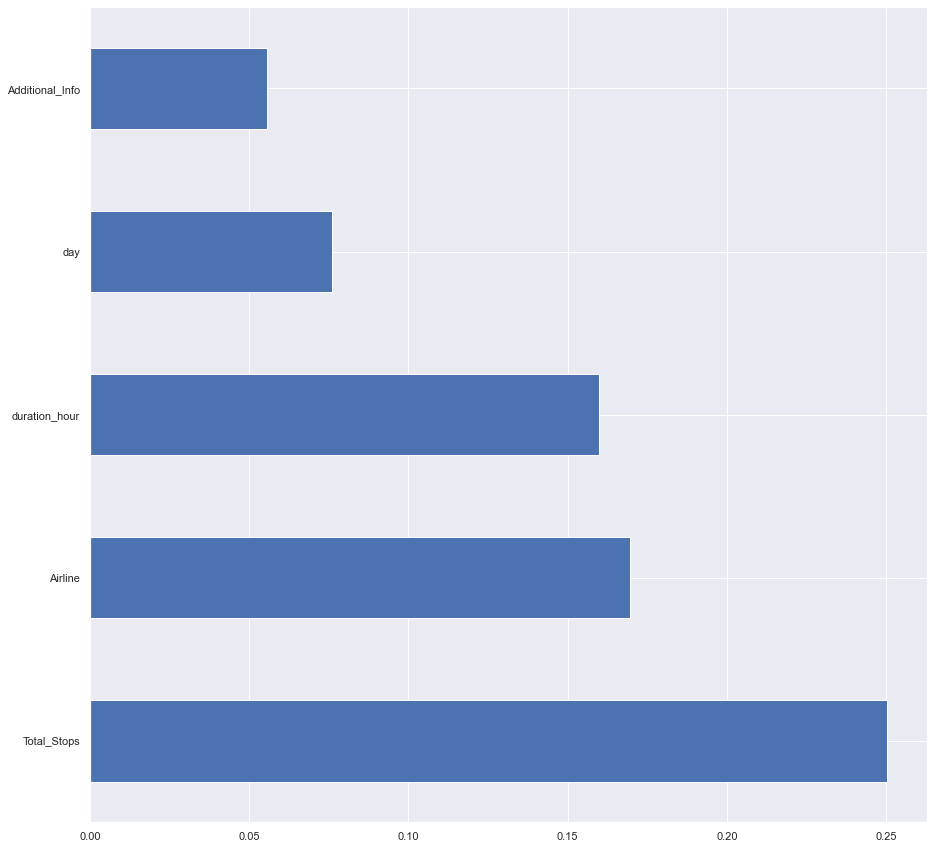

In [48]:
#feature importance analysis
from sklearn.ensemble import ExtraTreesRegressor 
model=ExtraTreesRegressor() 
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh') 
plt.show()

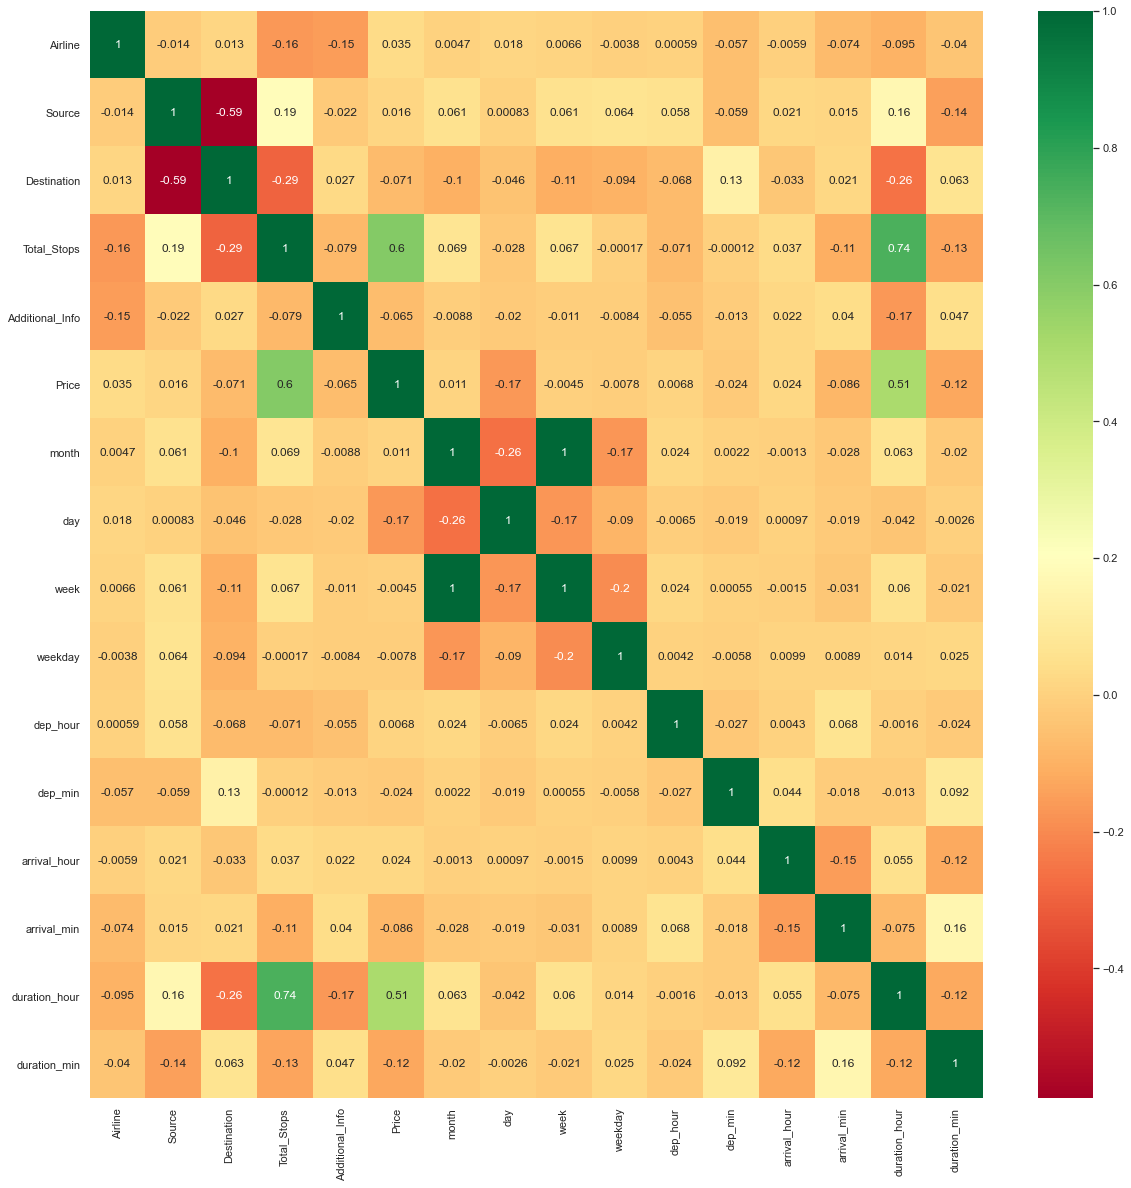

In [49]:
#feature correlation heatmap
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#plot heat map 
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [51]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,day,week,weekday,dep_hour,dep_min,arrival_hour,arrival_min,duration_hour,duration_min
0,3,0,5,0,8,3897.0,3,24,12,6,22,20,1,10,2,50
1,1,3,0,2,8,7662.0,1,5,1,5,5,50,13,15,7,25
2,5,2,1,2,8,13882.0,9,6,36,4,9,25,4,25,19,0
3,3,3,0,1,8,6218.0,12,5,49,3,18,5,23,30,5,25
4,3,0,5,1,8,13302.0,1,3,1,3,16,50,21,35,4,45


In [52]:
df.dtypes

Airline              int32
Source               int32
Destination          int32
Total_Stops          int32
Additional_Info      int32
Price              float64
month                int64
day                  int64
week                 int64
weekday              int64
dep_hour             int32
dep_min              int32
arrival_hour         int32
arrival_min          int32
duration_hour        int32
duration_min         int32
dtype: object

In [53]:
 from sklearn.tree import DecisionTreeRegressor   

In [54]:
dt = DecisionTreeRegressor()

In [55]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [56]:
dt.score(X_train,y_train),dt.score(X_test,y_test)

(0.9958597522620101, 0.7983835969366025)

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [58]:
rf_reg.score(X_train,y_train),rf_reg.score(X_test,y_test)

(0.9808378032618548, 0.8768941085877153)

In [60]:
#hyperparameter tuning
rf_reg.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor()>

In [62]:
n_estimators = [int(i) for i in np.linspace(100,1200,num=12)]

max_depth = [int(i) for i in np.linspace(5,30,num=6)]

min_weight_fraction_leaf =[0.1,0.2,0.4,0.5,0.7,0.6]

max_features = ['auto','sqrt']

min_samples_split = [4,5,7,10,15,100]

min_samples_leaf = [1,5,7,10]

In [63]:
ran_params = {'n_estimators' : n_estimators,
             'max_depth' : max_depth,
             'max_features' : max_features,
             'min_samples_split': min_samples_split,
             'min_samples_leaf':min_samples_leaf}

In [64]:
from sklearn.model_selection import RandomizedSearchCV
rand_reg = RandomizedSearchCV(rf_reg,param_distributions=ran_params,n_iter=100,cv=5,verbose=3,n_jobs=-1)

In [65]:
rand_reg.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  7.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 5, 7, 10],
                                        'min_samples_split': [4, 5, 7, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   verbose=3)

In [66]:
rand_reg.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [67]:
#default parametes give better score than the below
rand_reg.best_score_

0.8698865855800652

In [ ]:
import pickle
#saving model to disk
pickle.dump(rf_reg,open('model.pkl','wb'))

In [ ]:
#Loading model to compare results
model = pickle.load(open('model.pkl','rb'))
model

In [ ]:
model.score(X_train,y_train),model.score(X_test,y_test)

In [ ]:
df_test.drop("Price",axis=1, inplace=True)

In [ ]:
model.predict(df_test)

In [ ]:
y_pred=rf_reg.predict(df_test)

In [ ]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_excel("Sample_submission.xlsx")
datasets=pd.concat([sub_df,pred],axis=1)
datasets.columns=['Id','Price']
datasets.to_excel('Sample_submission1.xlsx',index=False)